In [1]:
import numpy as np

In [2]:
# 간단한 행렬 생성
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])  # 4 × 3 행렬

In [3]:
print("원본 행렬 A:")
print(A)
print(f"Shape: {A.shape}")

원본 행렬 A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Shape: (4, 3)


In [4]:
# SVD 분해
U, s, VT = np.linalg.svd(A, full_matrices=False)

In [5]:
# 특잇값 확인
print(f"특잇값: {s}")
print(f"가장 큰 값: {s[0]:.2f}")
print(f"가장 작은 값: {s[-1]:.2f}")


특잇값: [2.54624074e+01 1.29066168e+00 1.38648772e-15]
가장 큰 값: 25.46
가장 작은 값: 0.00


In [6]:
# 복원 확인
S = np.diag(s)  # 대각행렬로 변환
A_reconstructed = U @ S @ VT
print(f"복원 오차: {np.sum((A - A_reconstructed)**2):.10f}")
# 거의 0 (컴퓨터 오차만)

복원 오차: 0.0000000000


In [7]:
# 압축: 상위 2개만 사용
k = 2
A_compressed = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
print(f"압축 후 행렬:")
print(A_compressed)
print(f"압축 오차: {np.sum((A - A_compressed)**2):.2f}")

압축 후 행렬:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
압축 오차: 0.00


In [8]:
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
np.array(Image.open('lui.jpg'))

array([[[130, 139, 134],
        [125, 134, 129],
        [133, 142, 137],
        ...,
        [159, 168, 163],
        [171, 180, 175],
        [157, 166, 161]],

       [[102, 111, 106],
        [122, 131, 126],
        [132, 141, 136],
        ...,
        [158, 167, 162],
        [152, 161, 156],
        [154, 163, 158]],

       [[142, 151, 146],
        [137, 146, 141],
        [125, 134, 129],
        ...,
        [152, 161, 156],
        [146, 155, 150],
        [155, 164, 159]],

       ...,

       [[159, 158, 154],
        [166, 165, 161],
        [169, 168, 164],
        ...,
        [164, 170, 168],
        [150, 156, 154],
        [170, 176, 174]],

       [[160, 159, 155],
        [160, 159, 155],
        [158, 157, 153],
        ...,
        [175, 181, 179],
        [170, 176, 174],
        [175, 181, 179]],

       [[182, 181, 177],
        [181, 180, 176],
        [173, 172, 168],
        ...,
        [177, 183, 181],
        [169, 175, 173],
        [170, 176, 174]]

In [16]:
img = np.array(Image.open('lui.jpg').convert('L'))

print(f"원본 이미지 크기: {img.shape}")

원본 이미지 크기: (3000, 4000)


In [17]:
U, s, VT = np.linalg.svd(img, full_matrices=False)

In [19]:
s.shape

(3000,)

In [20]:
s

array([4.67048959e+05, 9.53348443e+04, 8.13407339e+04, ...,
       9.56881003e+00, 9.46637109e+00, 9.36298984e+00])

In [25]:
k_values = [5, 20, 50, 100]

In [1]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

# 원본
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# 특잇값 그래프
axes[0, 1].plot(s[:100])
axes[0, 1].set_title('Singular Values (top 100)')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Value')

# 누적 에너지
cumsum = np.cumsum(s**2) / np.sum(s**2)
axes[0, 2].plot(cumsum[:100])
axes[0, 2].set_title('Cumulative Energy')
axes[0, 2].axhline(y=0.9, color='r', linestyle='--', label='90%')
axes[0, 2].legend()


# 압축된 이미지들
for idx, k in enumerate(k_values):
    # k개 특잇값으로 재구성
    img_compressed = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    
    # 압축률 계산
    original_size = img.shape[0] * img.shape[1]
    compressed_size = k * (img.shape[0] + img.shape[1] + 1)
    ratio = (1 - compressed_size / original_size) * 100
    
    # 시각화
    row = 1 + idx // 3
    col = idx % 3
    axes[row, col].imshow(img_compressed, cmap='gray')
    axes[row, col].set_title(f'k={k} (압축률: {ratio:.1f}%)')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [27]:
# 정보 보존률 계산
for k in k_values:
    energy = np.sum(s[:k]**2) / np.sum(s**2) * 100
    print(f"k={k}: 정보 보존률 {energy:.1f}%")

k=5: 정보 보존률 96.5%
k=20: 정보 보존률 98.5%
k=50: 정보 보존률 99.2%
k=100: 정보 보존률 99.5%


In [28]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# 데이터 생성 (복잡한 모양)
X1, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)
X2 = np.random.uniform(-1, 9, (50, 2))  # 노이즈 추가
X = np.vstack([X1, X2])

print(f"데이터 포인트: {len(X)}개")

데이터 포인트: 350개


In [31]:
# Bandwidth 자동 추정
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
print(f"추정된 bandwidth: {bandwidth:.3f}")

추정된 bandwidth: 1.594


발견된 군집 수: 11개
군집 0: 107개
군집 1: 106개
군집 2: 103개
군집 3: 8개
군집 4: 6개
군집 5: 6개
군집 6: 2개
군집 7: 3개
군집 8: 7개
군집 9: 1개
군집 10: 1개


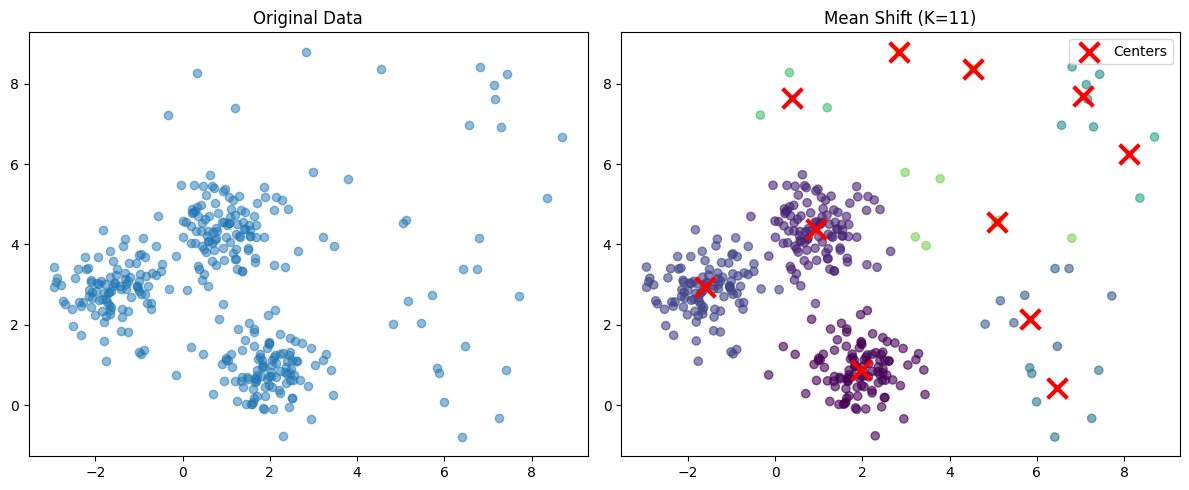

In [38]:
# Mean Shift 적용
ms = MeanShift(bandwidth=bandwidth)
labels = ms.fit_predict(X)
cluster_centers = ms.cluster_centers_

n_clusters = len(cluster_centers)
print(f"발견된 군집 수: {n_clusters}개")

# 각 군집 크기
for i in range(n_clusters):
    count = np.sum(labels == i)
    print(f"군집 {i}: {count}개")

# 시각화
plt.figure(figsize=(12, 5))

# 원본 데이터
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Original Data')

# Mean Shift 결과
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centers')
plt.title(f'Mean Shift (K={n_clusters})')
plt.legend()

plt.tight_layout()
plt.show()

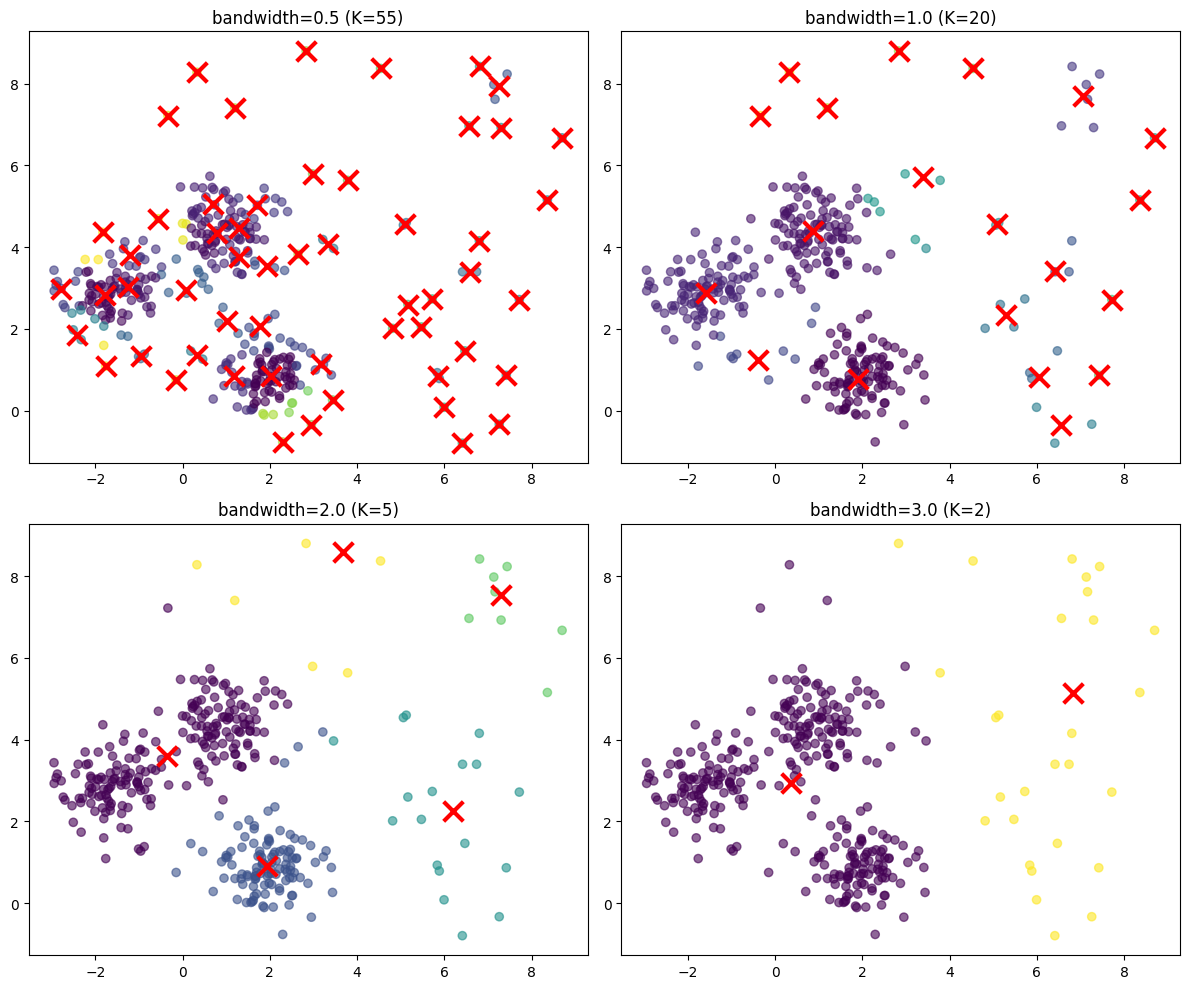

In [39]:
# 다양한 bandwidth 비교
bandwidths = [0.5, 1.0, 2.0, 3.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, bw in enumerate(bandwidths):
    ms = MeanShift(bandwidth=bw)
    labels = ms.fit_predict(X)
    n_clusters = len(ms.cluster_centers_)
    
    ax = axes[idx // 2, idx % 2]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1],
              c='red', marker='x', s=200, linewidths=3)
    ax.set_title(f'bandwidth={bw} (K={n_clusters})')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# 데이터 예시 (2차원)
X = np.random.randn(100, 2) * [5, 1] + [10, 0]

# bandwidth 자동 계산
bandwidth = estimate_bandwidth(X, quantile=0.2)
ms = MeanShift(bandwidth=bandwidth).fit(X)

print("군집 개수:", len(np.unique(ms.labels_)))


군집 개수: 5


In [41]:
from sklearn.cluster import DBSCAN
import numpy as np

# 샘플 데이터
X = np.random.randn(100, 2)

# eps=0.3, min_samples=5로 설정
db = DBSCAN(eps=0.3, min_samples=5).fit(X)

print("군집 개수:", len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
print("노이즈 개수:", list(db.labels_).count(-1))


군집 개수: 6
노이즈 개수: 58
